### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Read Dataset

In [2]:


df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


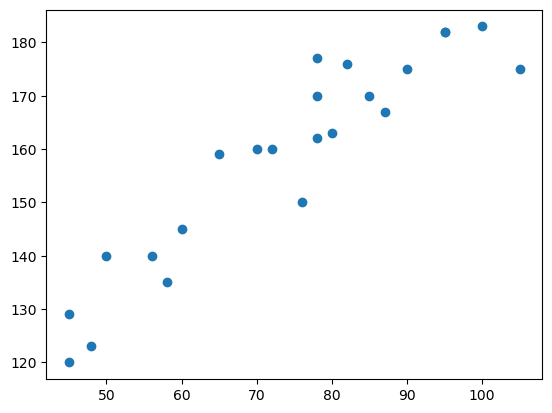

In [3]:
plt.scatter(x = 'Weight', y ='Height', data = df)

### 2. EDA

In [4]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


### 3. Divide our Dataset into Independant and Dependent Feature

In [7]:
X = df[['Weight']]
y = df['Height']

In [8]:
X.shape

(23, 1)

In [9]:
y.shape

(23,)

### 4. Further decide the dataset into train and test 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [12]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [13]:
y_train.shape, y_test.shape

((18,), (5,))

### 5.Standard Scaling on train and test data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [33]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

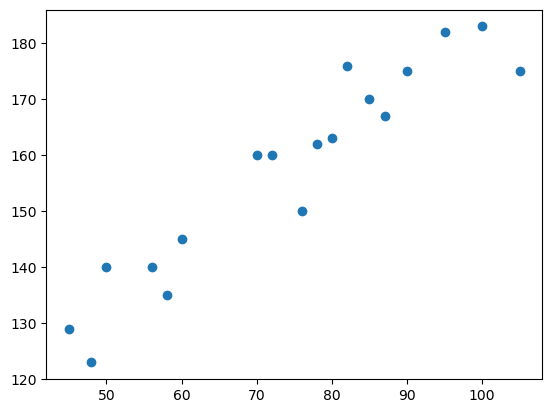

In [34]:
plt.scatter(X_train, y_train) # range  = -1.5 to 1.5

### 6. Model Training

In [19]:
from sklearn.linear_model import LinearRegression

In [35]:
regressor = LinearRegression()

In [36]:
## Training the train data

regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
#theta 0

regressor.intercept_

157.5

In [38]:
#theata 1

regressor.coef_

array([17.03440872])

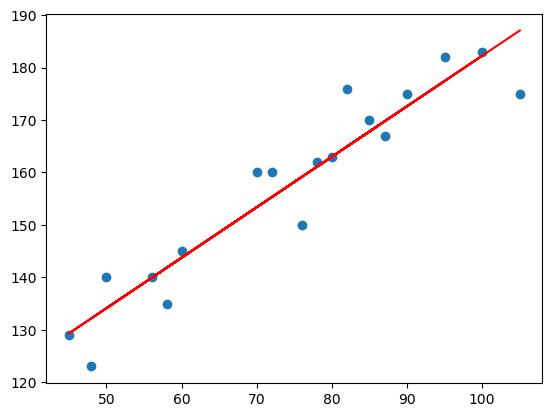

In [40]:
plt.scatter(X_train, y_train) #train data points

plt.plot(X_train, regressor.predict(X_train_scaled), color = 'Red') ##best fit line

### 7. prediction for test data

In [41]:
y_pred_test = regressor.predict(X_test_scaled)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [42]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

### 8. Performance Metrices MAE, MSE, RMSE

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


### 8. Accuracy of the model R Squared  and Adjusted R Squared

In [47]:
from sklearn.metrics import r2_score

In [45]:
# R square

score = r2_score(y_test, y_pred_test)
score

0.776986986042344

In [46]:
# Adjusted R Square

1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.7026493147231252